# Drum and Ebony Skin Bleaching Ads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display
import os
import sys
import csv
import nltk
from string import punctuation
import pygal
#pd.set_option('display.mpl_style', 'default')

In [2]:
ebony = pd.read_csv("Ebony.skin.ads.1960-1990.csv", parse_dates=True, index_col='Year')
ebony.head()
#ebony.tail()

,Region,Source,Product name,chemical/active ingredient,Structure,Chemistry,Claims,Legal issues and Politics,Race,Age,Advertising strategy *quotes-catch phrase*,Size of Advert,Pg reference (quentin marked),Notes
Year,,,,,,,,,,,,,,
1960-01-01,NaN,Ebony,Long Aid Bleach and Glow,unnamed,NaN,NaN,""" - wakes up dark, dull complexion! Conceals u...",NaN,NaN,NaN,NaN,1/2 pg,63,small part of 1.2 pg ad for Long Aid hair prod...
1960-01-01,NaN,NaN,Mercolized Wax Cream,ammoniated mercury; zinc oxide,NaN,NaN,"""If your skin doesn't look actually lighter af...",NaN,NaN,NaN,"""Mercolized Wax Cream guarantees lighter looki...",1/4 pg,72,ingredient on image of product; not mentioned ...
1960-01-01,NaN,NaN,Black and White Bleaching Cream,unnamed,NaN,NaN,"""And you, too, can have a glamorous complexion...",NaN,NaN,NaN,"""Lighter, brighter skin is irresistable""",1/8 pg,83,drawing of white man and white woman in ad
1960-01-01,NaN,NaN,Nadinola Bleaching Cream,"""wonder-working A-M""",NaN,NaN,"""Don't let dull, dark skin rob you of romance....",NaN,NaN,NaN,"""LIFE IS MORE FUN when your complexion is clea...",full pg,91,two types advertised - oily and dry skin
1960-01-01,NaN,NaN,Dr. Fred Palmer's Double Strength Skin Whitener,zinc phenolsulfonate,NaN,NaN,"""Yes in just 7 days be delighted how fast and ...",NaN,NaN,NaN,"""DR. FRED PALMER'S IN JUST 7 DAYS MUST GIVE YO...",1/8 pg,108,NaN


In [3]:
drum = pd.read_csv("Drum_Skin_Lighteners_1965_1988.csv", parse_dates=True, index_col='Year')
drum.head(5)

,Product name,chemical/active ingredient,Claims,Legal issues and Politics,Race,Age,Advertising strategy *quotes-catch phrase*,Size of Advert,Pg. reference ( marked),Notes
Year,,,,,,,,,,
1965-01-01,ARTRA skin tone cream,Hydroquinone,…to make their skin lighter and lovelier…lovel...,Black model and white pharmacist/doctor,Black,20+,"Lighter, lovelier skin today…the American way!'",full pg.,pg. 2,The ad says that the cream was developed after...
1965-01-01,NaN,NaN,brightens skin.' '…lightens from the first day...,n/a,NaN,NaN,Cream your skin lighter and brighter with ama...,NaN,pg. 2,Ad states that it is a medicated beauty bar. S...
1965-01-01,NaN,NaN,immediately.' '…keeps skin beautiful and clean...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965-01-01,Artra beauty bar,Hydroquinone,…mild and gentle…keeps skin free from blemishe...,NaN,NaN,20+,Medicated soap for complexion care,NaN,NaN,NaN
1965-01-01,Aloma Crème blanche,unnamed,"…clears and lightens the skin, smooth's away b...",Black model,Black,20-35,good things happen to a pretty girl,full pg.,NaN,Ad states that using this product will increas...


## Terms 

In [4]:
years_ebony = ebony.index
years_ebony = set(years_ebony.year)

In [5]:
years_drum = drum.index
years_drum = set(years_drum.year)

In [6]:
claims_ebony = ebony["Claims"]
claims_drum = drum['Claims']
terms = {
"bleach",
"bleaching",
"lightening",
"lighten",
"lightener",
"glow",
"tone",
"smooth",
"beauty",
"fade",
"brightenting",
"brightener",
"dark", 
"darkness",
"natural", 
"unnatural",
"soft",
"success",
"complexion"
}

In [7]:
claims_drum = claims_drum.dropna()

In [8]:
claims_ebony = claims_ebony.dropna()
#claims_drum.replace(',','',regex = True) 

In [9]:
claims_drum_sents = []
i = 0
for claim in claims_drum:
    temp_claim = "".join([ch for ch in claim if (ch.isalpha() or ch == " ") and ch not in punctuation]).lower()
    claims_drum_sents.append((str(claims_drum.keys()[i]),temp_claim))
    i += 1

In [10]:
claims_ebony_sents = []
i = 0
for claim in claims_ebony:
    temp_claim = "".join([ch for ch in claim if (ch.isalpha() or ch == " ") and ch not in punctuation]).lower()
    claims_ebony_sents.append((str(claims_ebony.keys()[i]),temp_claim))
    i += 1

In [11]:
drum_term_counts = {}
ebony_term_counts = {}
for term in terms:
    temp_term = []
    for year in years_ebony:
        e = 0
        for y,c in claims_ebony_sents:
            if str(year) == y[:4]:
                if term in c.split():
                    e += 1
        temp_term.append(e)
    ebony_term_counts[term] = temp_term
    temp_term = []
    for year in years_drum:
        e = 0
        for y,c in claims_drum_sents:
            if str(year) == y[:4]:
                if term in c.split():
                    e += 1
        temp_term.append(e)
    drum_term_counts[term] = temp_term
print("Ebony Term Counts")
print(ebony_term_counts)
print("-"*100)
print("Drum Term Counts")
print(drum_term_counts)

Ebony Term Counts
{'smooth': [17, 30, 12, 9, 19, 8, 6, 5, 5, 5, 21, 18, 5, 4, 9, 6, 4, 11, 3, 9, 4, 3, 10, 7, 2, 4, 11, 27, 26, 21, 13], 'lightening': [9, 10, 11, 2, 17, 6, 6, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'soft': [17, 27, 19, 22, 17, 8, 2, 5, 3, 10, 8, 6, 2, 4, 3, 8, 11, 11, 3, 6, 0, 2, 0, 2, 1, 2, 0, 12, 11, 3, 0], 'lightener': [4, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'natural': [1, 0, 0, 0, 3, 10, 13, 5, 10, 6, 14, 15, 5, 1, 0, 0, 8, 9, 3, 9, 1, 0, 0, 0, 0, 1, 3, 11, 12, 2, 0], 'darkness': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 8, 6, 2, 0, 0, 0, 0, 0, 0, 0, 0], 'bleach': [12, 26, 15, 10, 7, 7, 7, 4, 8, 15, 20, 16, 4, 6, 5, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 0, 0], 'glow': [9, 18, 17, 26, 23, 14, 7, 4, 3, 4, 6, 7, 4, 6, 5, 4, 7, 8, 6, 9, 8, 3, 3, 4, 0, 2, 4, 2, 8, 8, 5], 'success': [0, 2, 5, 7, 1, 0, 7, 2, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 4, 

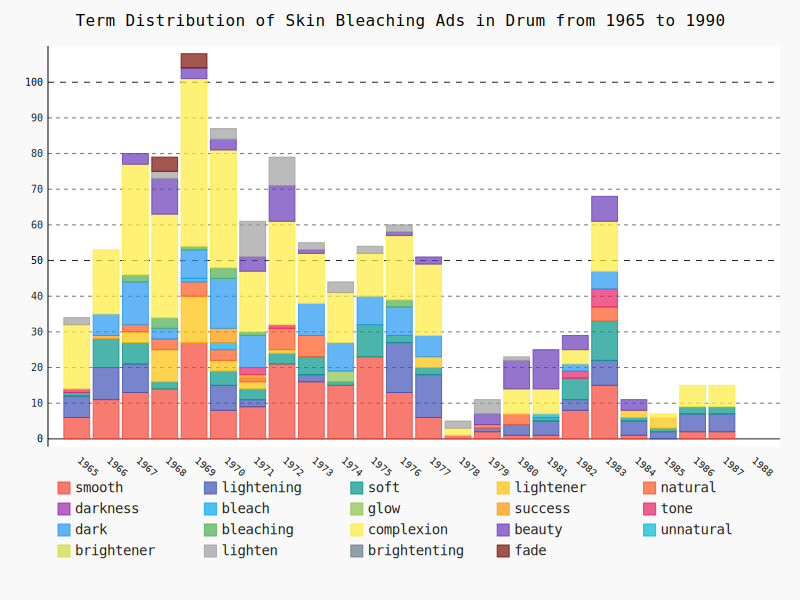

In [12]:
line_chart = pygal.StackedBar(x_label_rotation=40, legend_at_bottom=True)
line_chart.title = 'Term Distribution of Skin Bleaching Ads in Drum from 1965 to 1990'
line_chart.x_labels = map(str, range(1965, 1989))
for term in terms:
    line_chart.add(term, drum_term_counts[term])
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("drum_term_counts_by_year.svg")

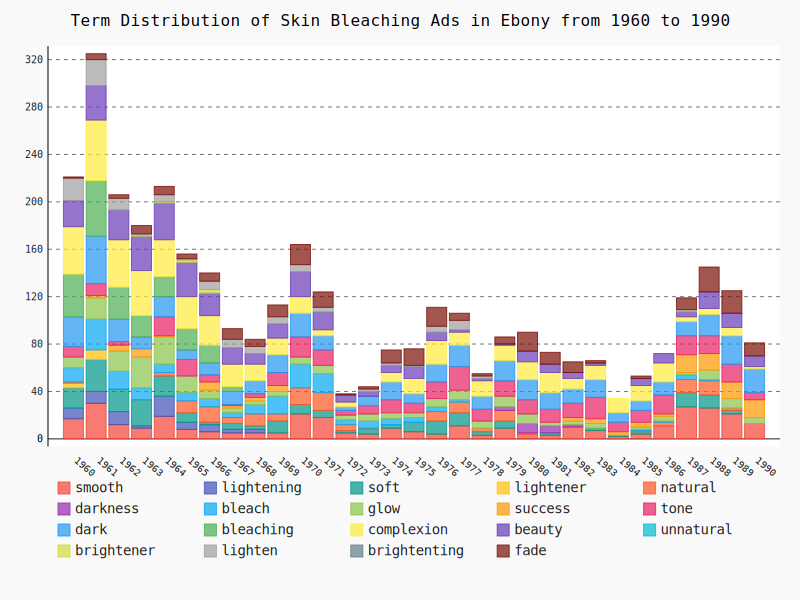

In [13]:
line_chart = pygal.StackedBar(x_label_rotation=40, legend_at_bottom=True)
line_chart.title = 'Term Distribution of Skin Bleaching Ads in Ebony from 1960 to 1990'
line_chart.x_labels = map(str, range(1960, 1991))
for term in terms:
    line_chart.add(term, ebony_term_counts[term])
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("ebony_term_counts_by_year.svg")

In [14]:
drum_counts = []
ebony_counts = []
for year in years_ebony:
    e = 0
    for y,c in claims_ebony_sents:
        if str(year) == y[:4]:
            e += 1
    ebony_counts.append(e)
    d = 0
    for y,c in claims_drum_sents:
        if str(year) == y[:4]:
            d += 1
    drum_counts.append(d)
print(ebony_counts)
print(drum_counts)

[72, 103, 74, 82, 72, 58, 54, 36, 31, 34, 35, 24, 10, 9, 15, 22, 35, 39, 28, 31, 29, 32, 20, 24, 14, 20, 23, 34, 42, 41, 31]
[0, 0, 0, 0, 0, 46, 62, 93, 108, 132, 134, 96, 80, 99, 60, 82, 65, 68, 6, 12, 22, 28, 25, 57, 15, 7, 10, 17, 0, 0, 0]


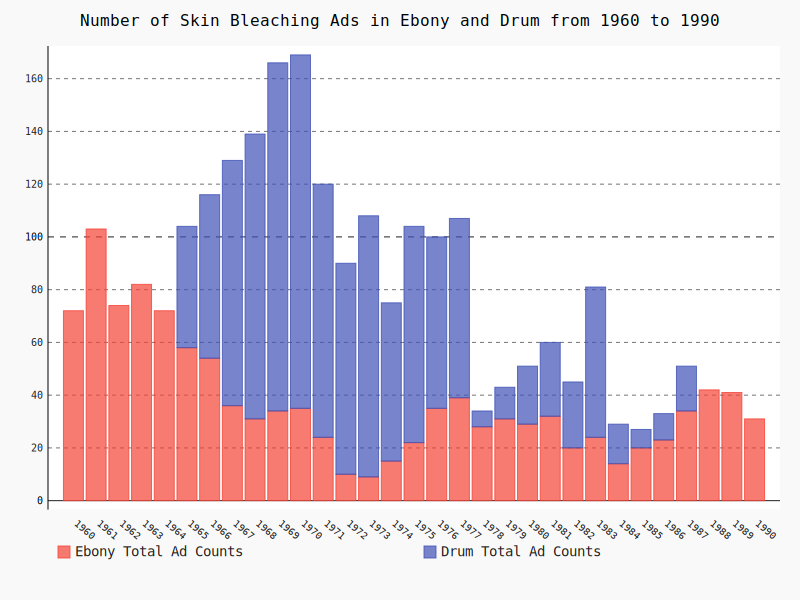

In [15]:
line_chart = pygal.StackedBar(x_label_rotation=40, legend_at_bottom=True)
line_chart.title = 'Number of Skin Bleaching Ads in Ebony and Drum from 1960 to 1990'
line_chart.x_labels = map(str, range(1960, 1991))
line_chart.add("Ebony Total Ad Counts", ebony_counts)
line_chart.add("Drum Total Ad Counts", drum_counts)
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("drum_and_ebony_ad_counts_by_year.svg")

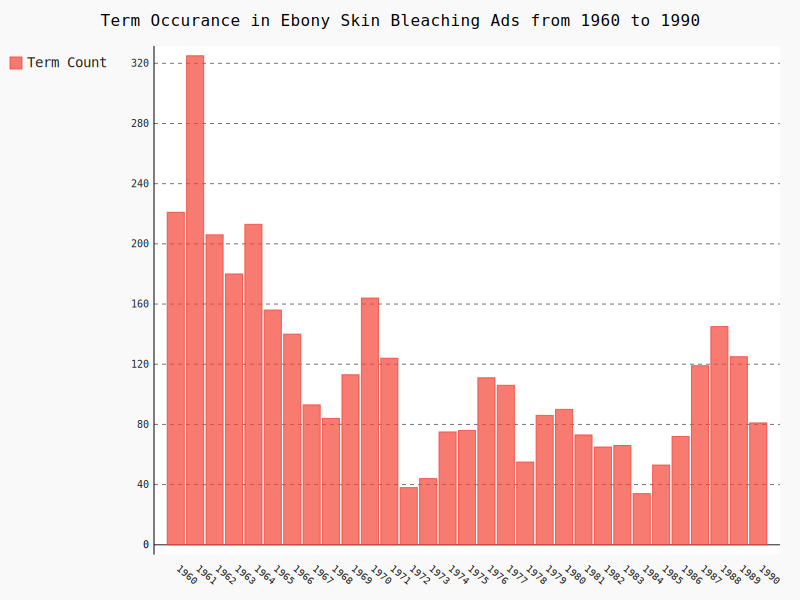

In [16]:
line_chart = pygal.StackedBar(x_label_rotation=40)
line_chart.title = 'Term Occurance in Ebony Skin Bleaching Ads from 1960 to 1990'
line_chart.x_labels = map(str, range(1960, 1991))
ebony_year_list = []
for year in years_ebony:
    i = 0
    for y,c in claims_ebony_sents:
        if str(year) == y[:4]:
            for term in terms:
                if term in c.split():
                    i += 1
    ebony_year_list.append(i)
line_chart.add("Term Count", ebony_year_list)
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("ebony_term_occurance_by_year.svg")

In [17]:
claims_drum = claims_drum.dropna()
#claims_drum.replace(',','',regex = True) 

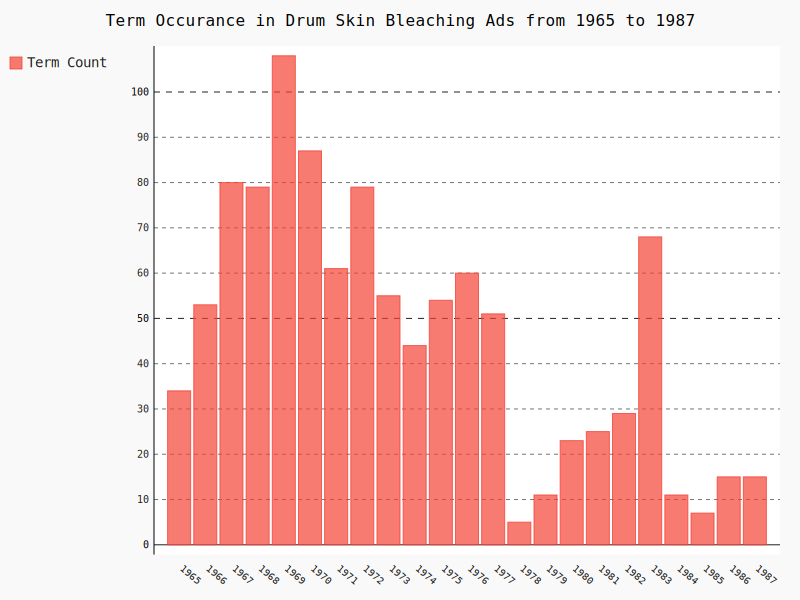

In [18]:
line_chart = pygal.StackedBar(x_label_rotation=40)
line_chart.title = 'Term Occurance in Drum Skin Bleaching Ads from 1965 to 1987'
line_chart.x_labels = map(str, range(1965, 1988))
drum_year_list = []
for year in years_drum:
    i = 0
    for y,c in claims_drum_sents:
        if str(year) == y[:4]:
            for term in terms:
                if term in c.split():
                    i += 1
    drum_year_list.append(i)
line_chart.add("Term Count", drum_year_list)
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("drum_term_occurance_by_year.svg")

In [19]:
fill = [None for n in range(0,5)]

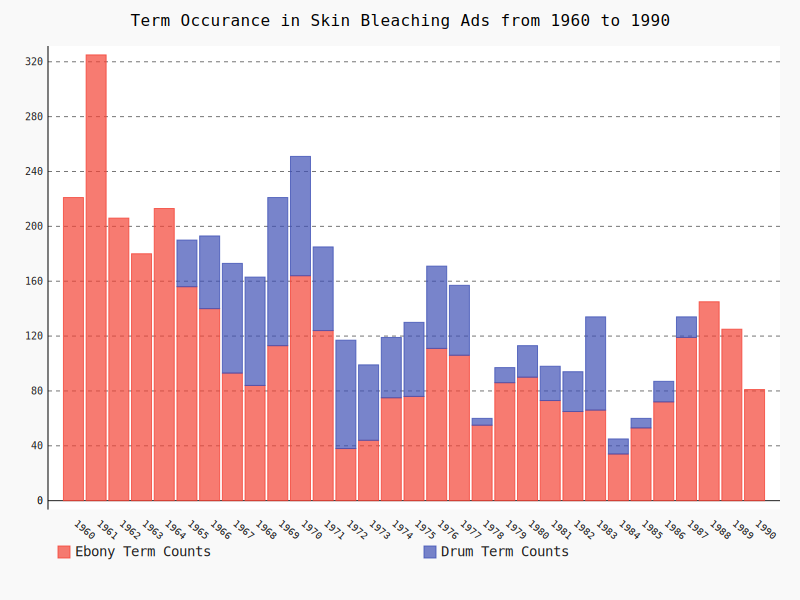

In [20]:
line_chart = pygal.StackedBar(x_label_rotation=40, legend_at_bottom=True)
line_chart.title = 'Term Occurance in Skin Bleaching Ads from 1960 to 1990'
line_chart.x_labels = map(str, range(1960, 1991))
line_chart.add("Ebony Term Counts", ebony_year_list)
line_chart.add("Drum Term Counts", fill+drum_year_list)
display(SVG(line_chart.render(disable_xml_declaration=True))) 
line_chart.render_to_file("drum_and_ebony_term_occurance_by_year.svg")

In [21]:
def add(list_counts):
    total = 0
    for i in list_counts:
        total += i
    return total

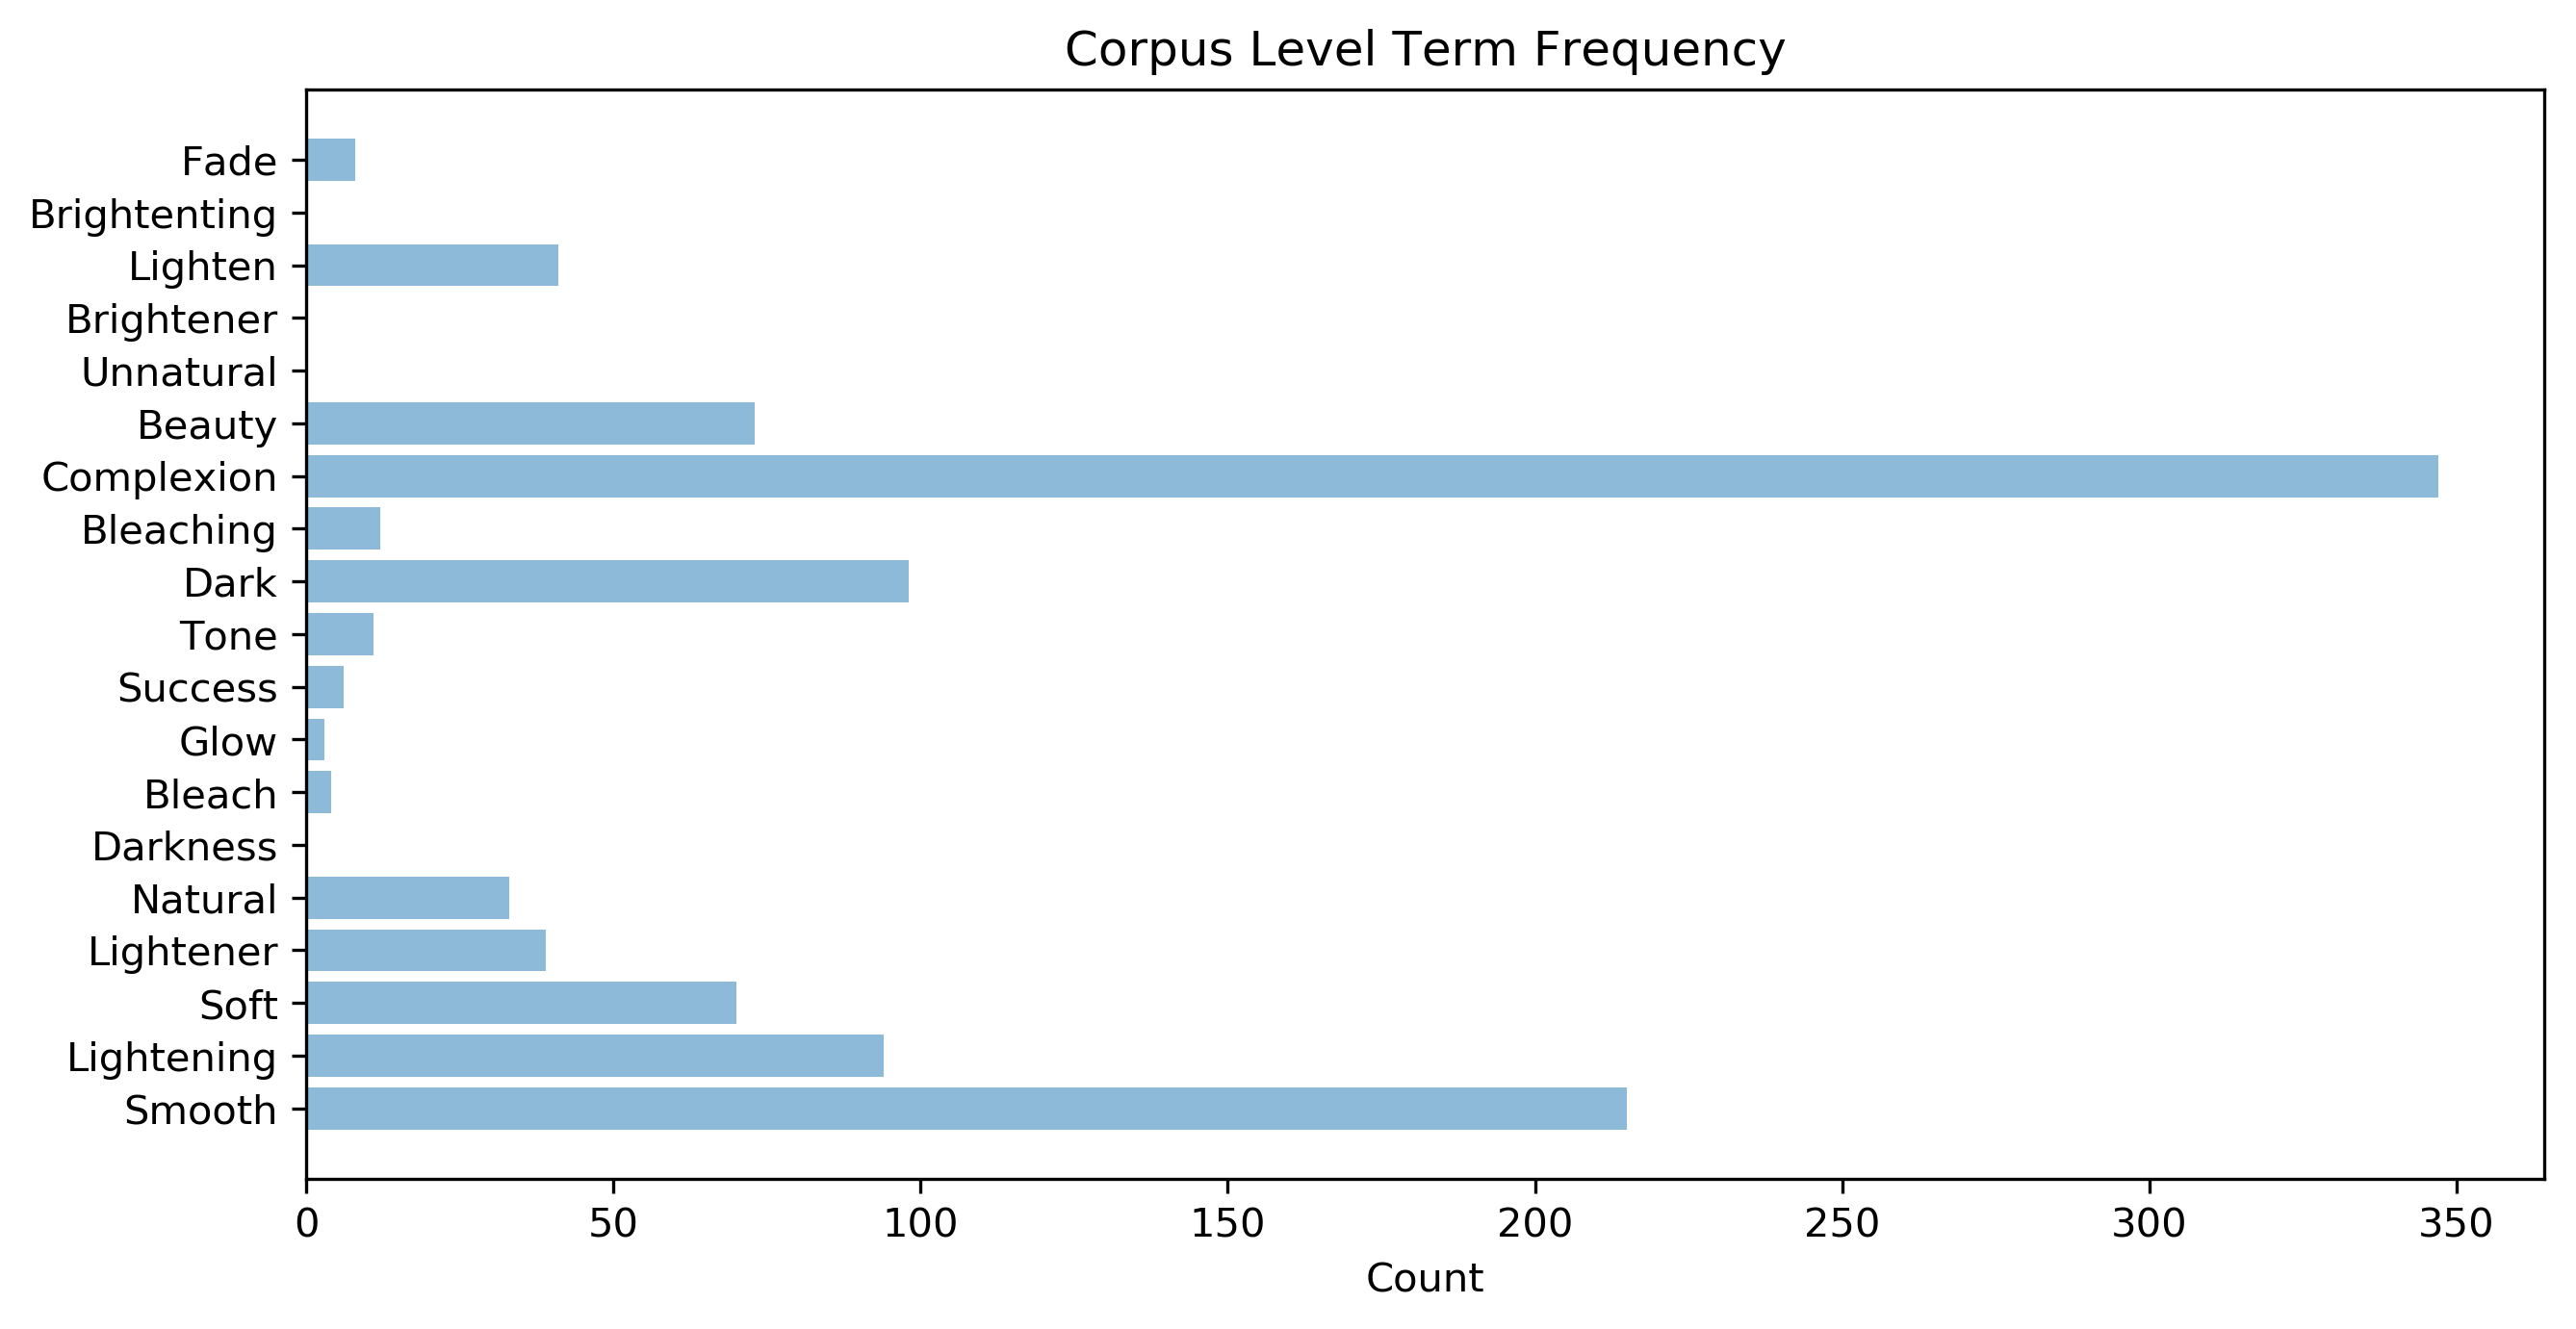

In [22]:
successfig = plt.figure(figsize=(10, 5), dpi=300)
objects = tuple([term.capitalize() for term in terms])
corpus_counts = dict(ebony_term_counts, **drum_term_counts)
termS1 = [add(count) for word,count in corpus_counts.items() if word in terms]
y_pos = np.arange(len(termS1))

plt.barh(y_pos, termS1, align='center', alpha=.5)
plt.yticks(y_pos, objects, fontsize = 10)
plt.xlabel('Count')
plt.title('Corpus Level Term Frequency')
 
plt.show()
successfig.savefig("corpus_freqs.png")

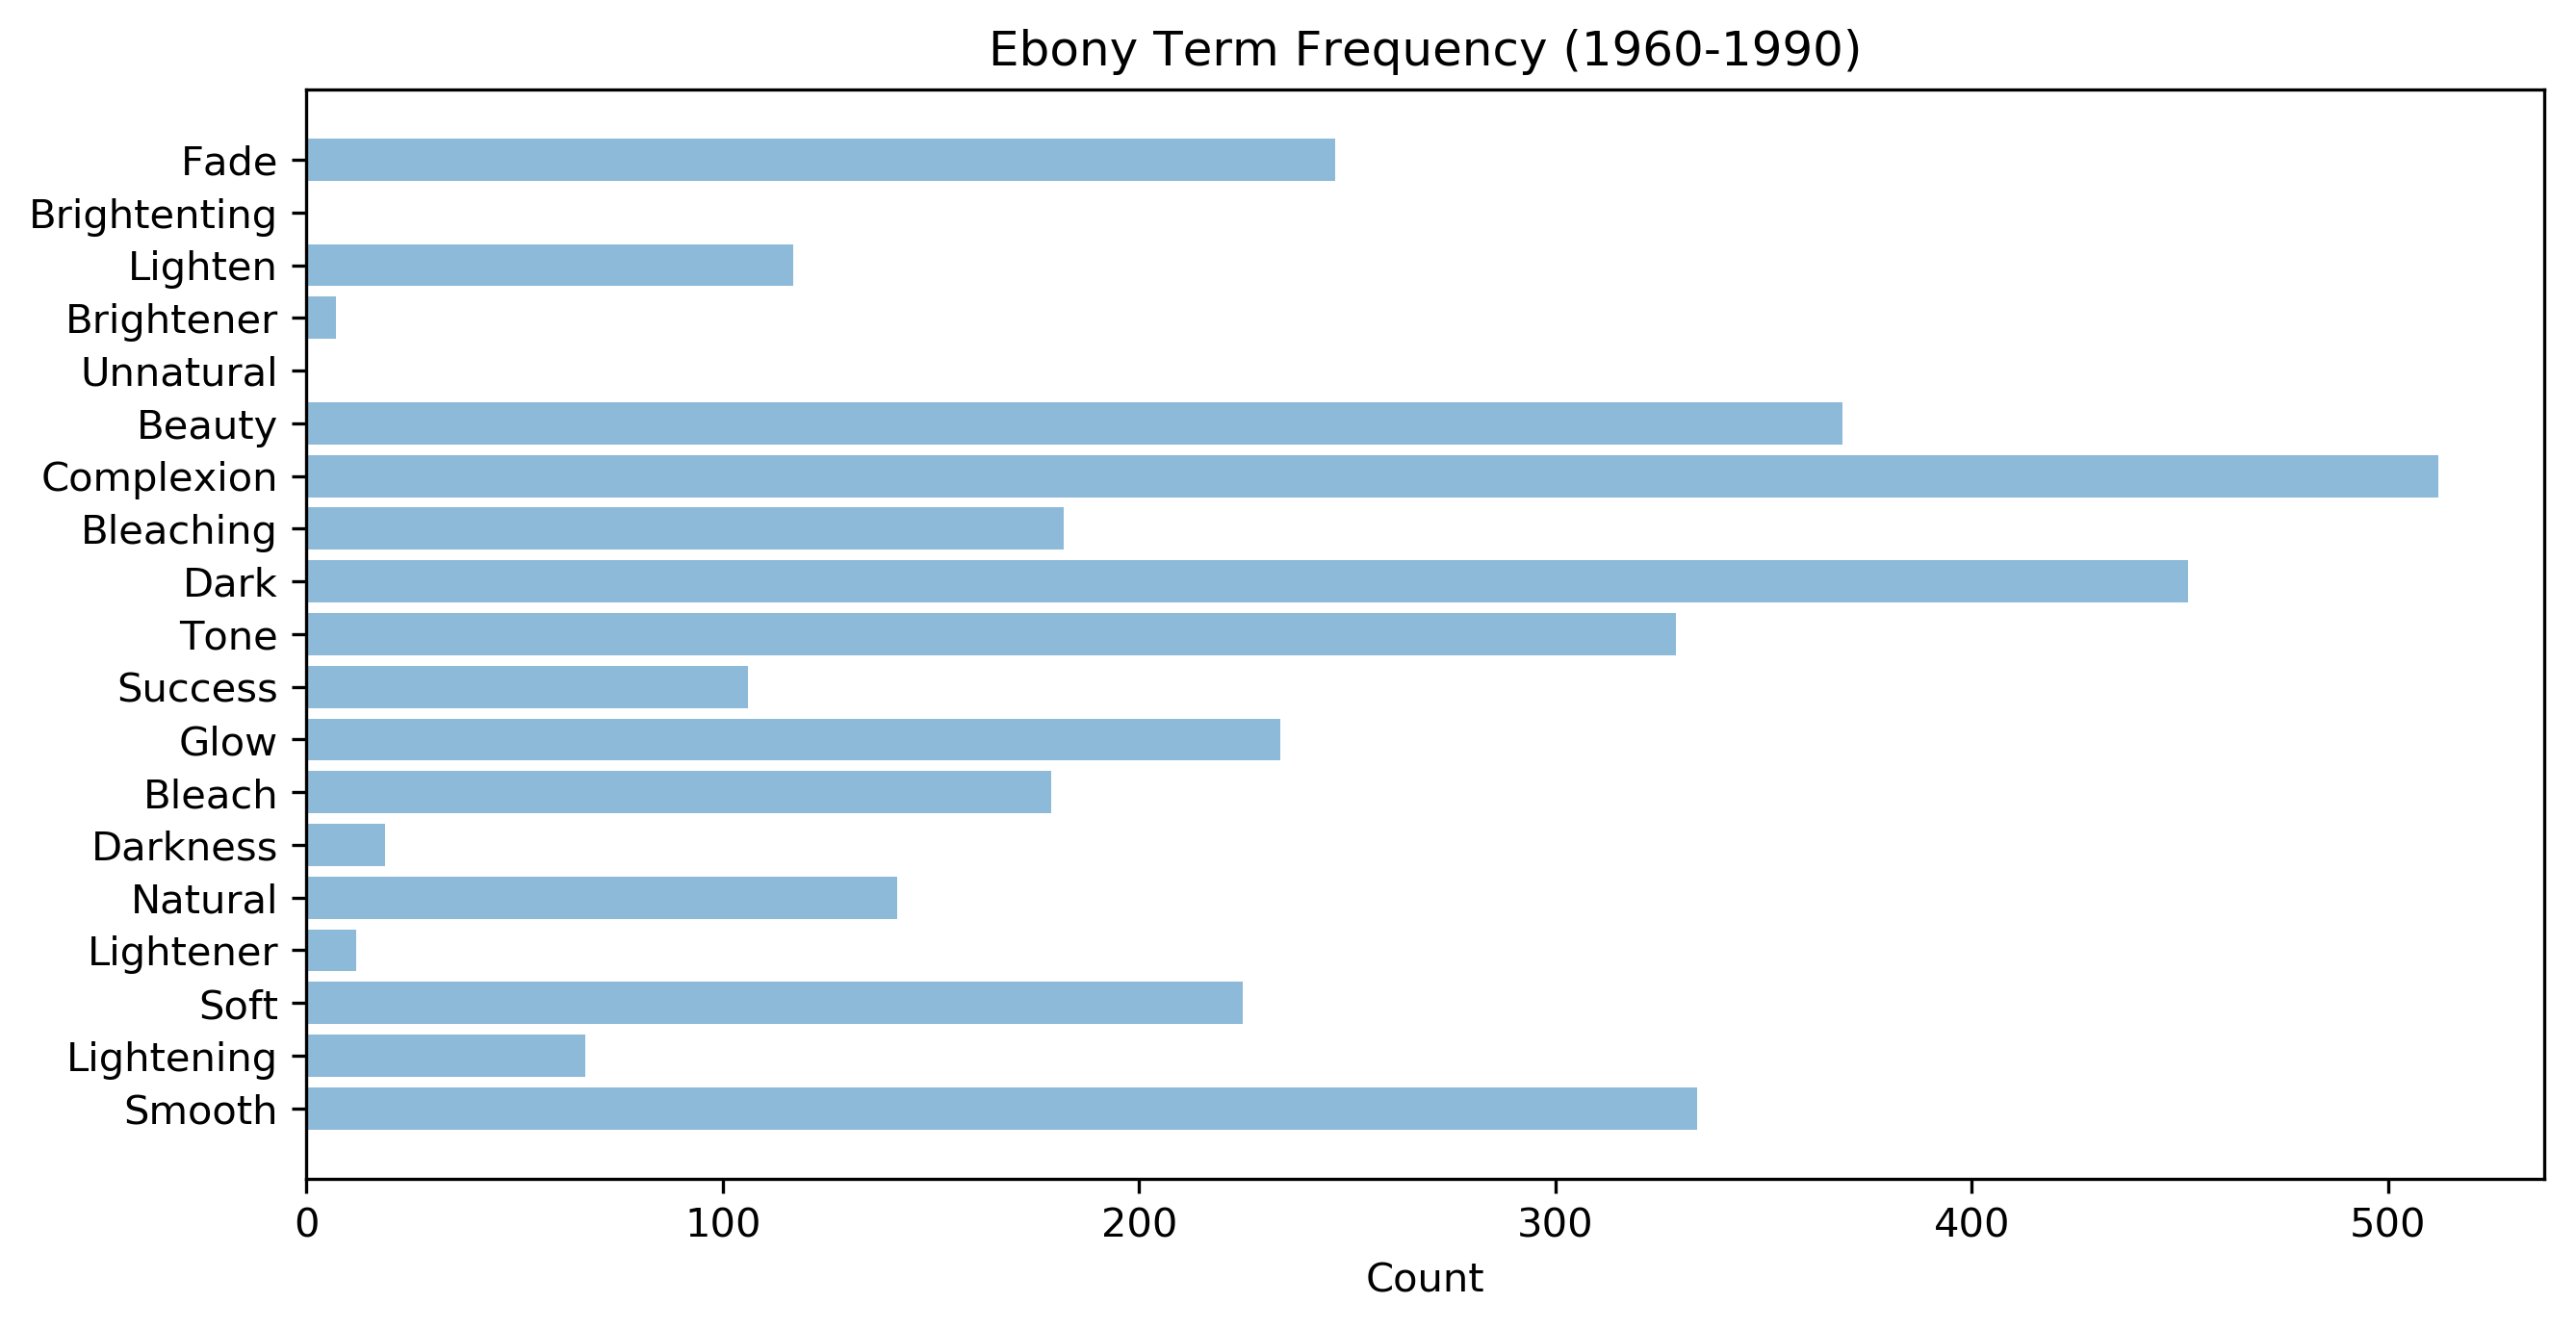

In [23]:
successfig = plt.figure(figsize=(10, 5), dpi=300)
objects = tuple([term.capitalize() for term in terms])
termS1 = [add(count) for word,count in ebony_term_counts.items() if word in terms]
y_pos = np.arange(len(termS1))

plt.barh(y_pos, termS1, align='center', alpha=.5)
plt.yticks(y_pos, objects, fontsize = 10)
plt.xlabel('Count')
plt.title('Ebony Term Frequency (1960-1990)')
 
plt.show()
successfig.savefig("ebony_freqs.png")

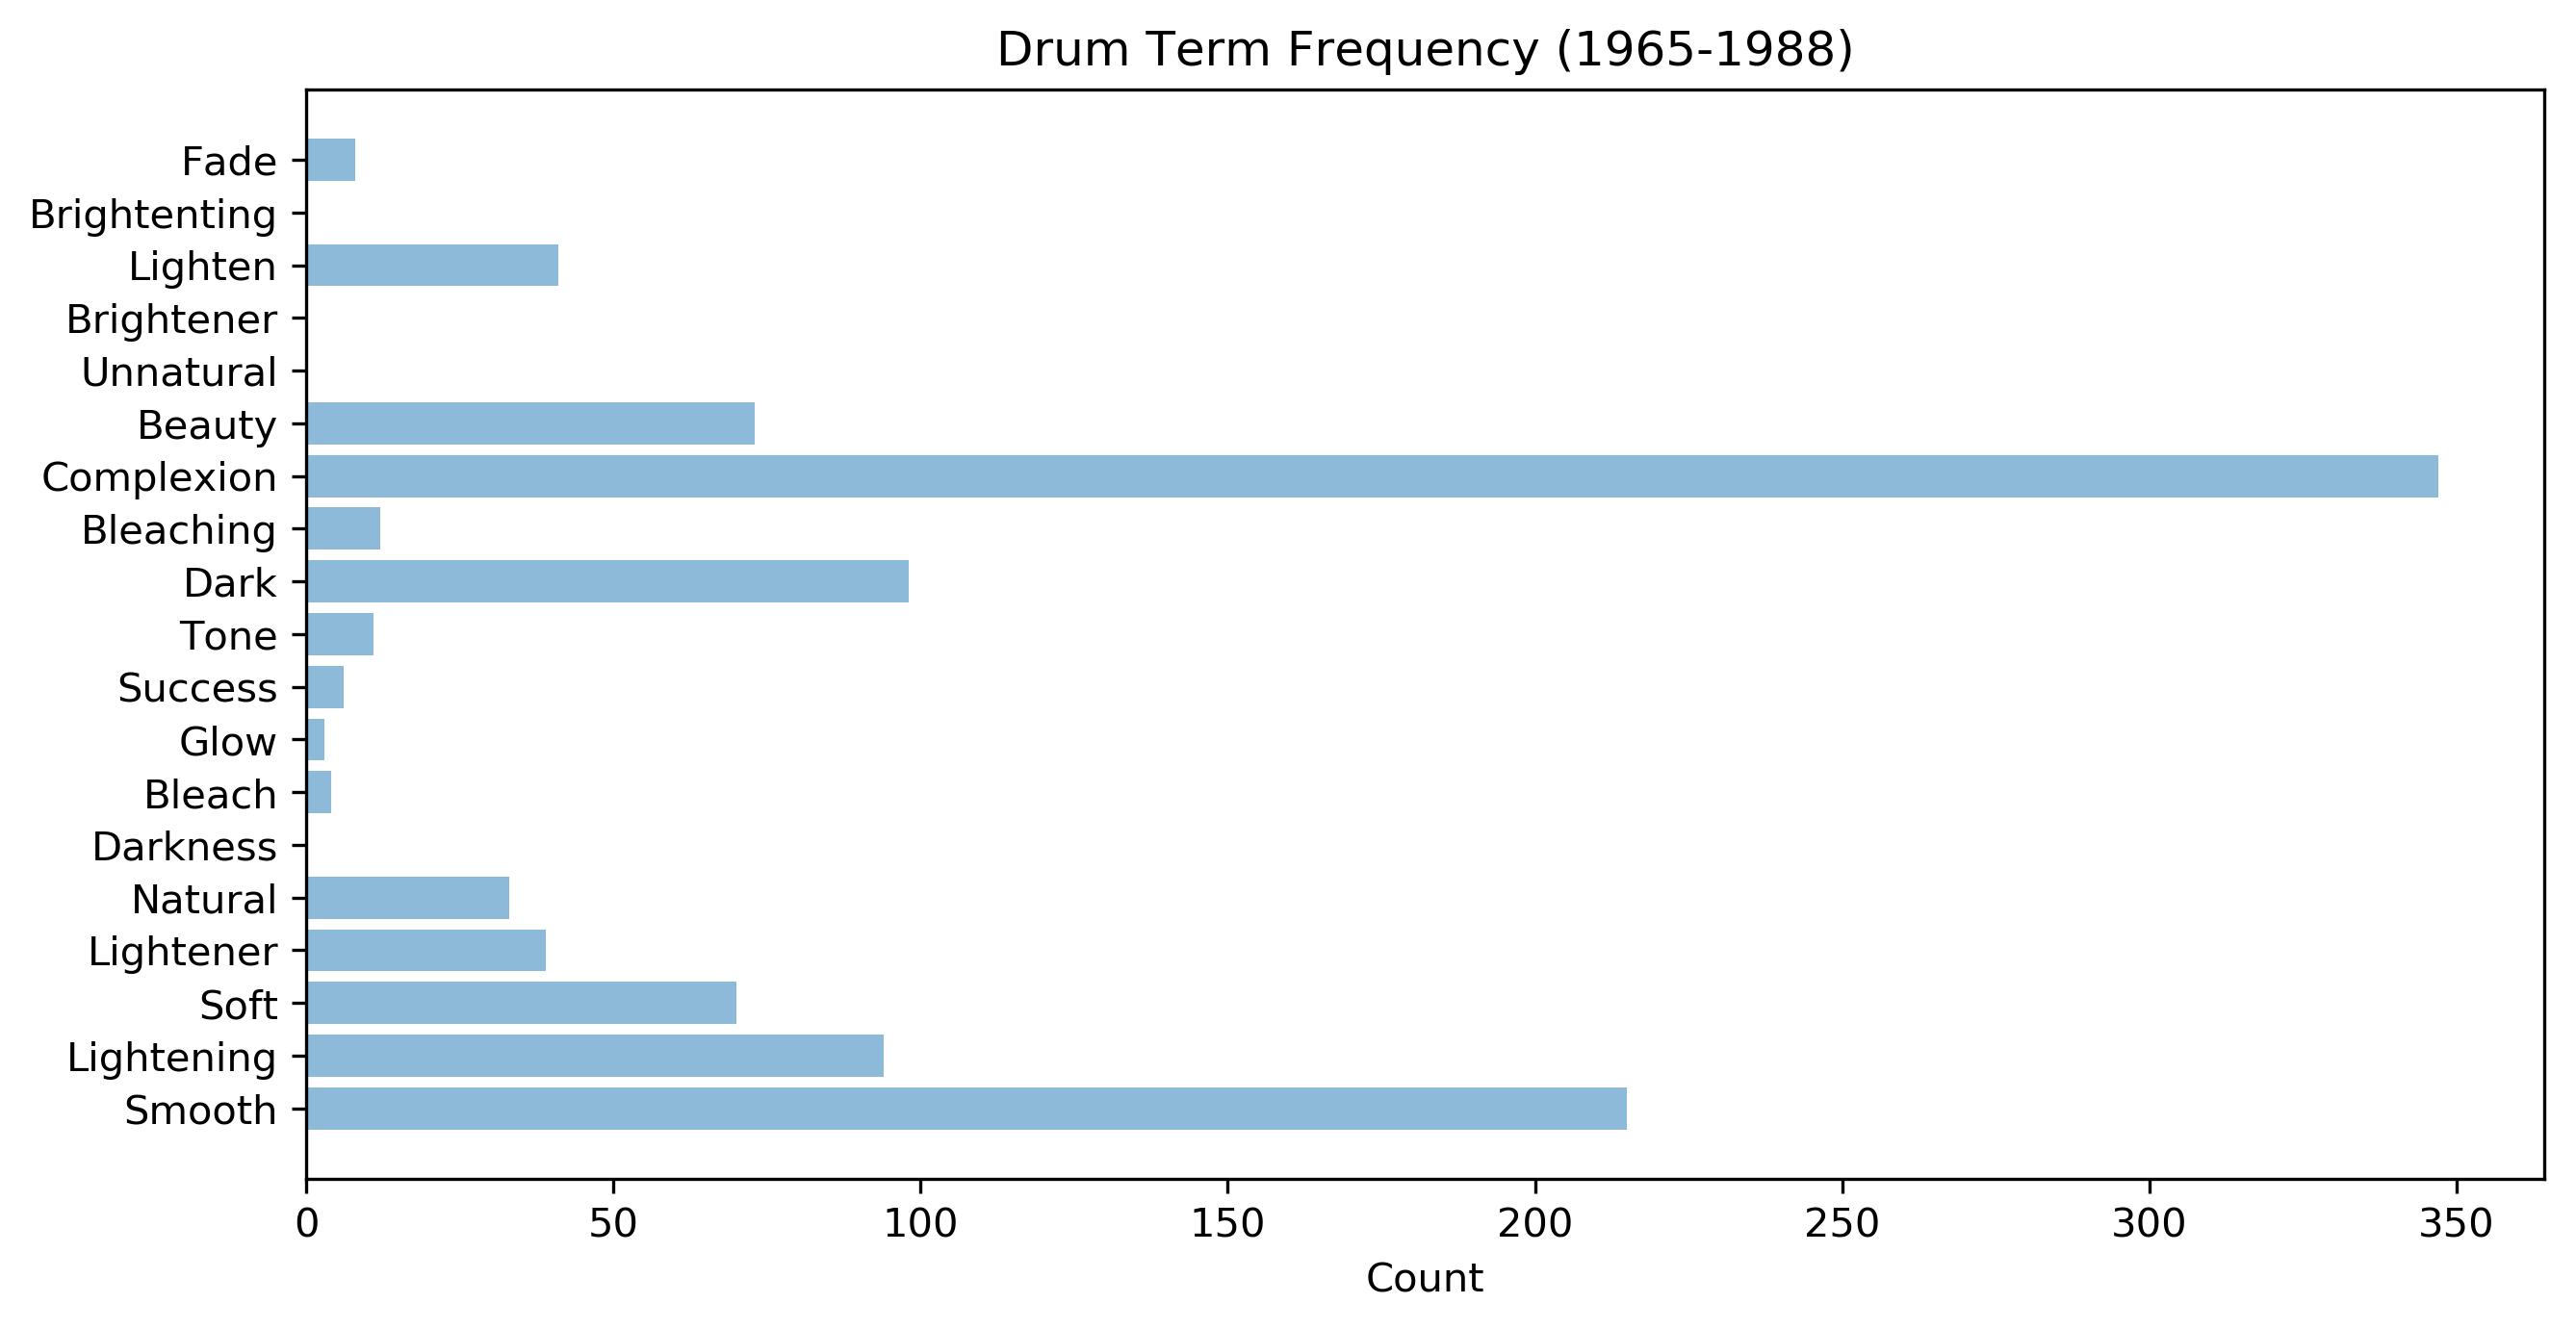

In [24]:
successfig = plt.figure(figsize=(10, 5), dpi=300)
objects = tuple([term.capitalize() for term in terms])
termS1 = [add(count) for word,count in drum_term_counts.items() if word in terms]
y_pos = np.arange(len(termS1))

plt.barh(y_pos, termS1, align='center', alpha=.5)
plt.yticks(y_pos, objects, fontsize = 10)
plt.xlabel('Count')
plt.title('Drum Term Frequency (1965-1988)')
 
plt.show()
successfig.savefig("drum_freqs.png")

<Figure size 6000x3000 with 0 Axes>

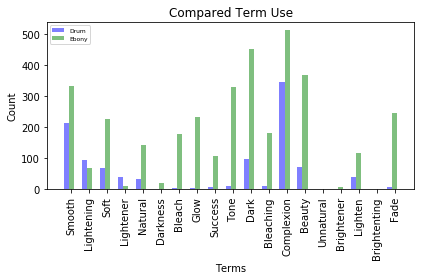

In [25]:
# data to plot
n_groups = len(objects)
fig = plt.figure(figsize=(20, 10), dpi=300)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.28
opacity = 0.5

 
rects1 = plt.bar(index, [add(count) for word,count in drum_term_counts.items() if word in terms], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Drum')
 
rects2 = plt.bar(index + bar_width, [add(count) for word,count in ebony_term_counts.items() if word in terms], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Ebony')
 
plt.xlabel('Terms')
plt.ylabel('Count')
plt.title('Compared Term Use')
plt.xticks(index + bar_width, objects)
plt.xticks(rotation=90)
plt.legend(loc=2, prop={'size': 6})
 
plt.tight_layout()
plt.show()
fig.savefig("compared_term_use.png")